In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import scipy
import scipy.stats
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)



from pandas import *
import os
import datetime
#sns.set_style("darkgrid")
import matplotlib.image as mpimg
from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime




In [2]:
train_md=pd.read_csv("train_spray_weather_AL.csv",float_precision='round_trip')

## Sub dataframe 

In [23]:
# sub_2 :  dataframe contains only virus-carrying species 
sub_2=train_md.loc[train_md["Species"].isin(["CULEX PIPIENS","CULEX PIPIENS/RESTUANS","CULEX RESTUANS"])]


#only block 10 with virus carrying species 
sub_2_block =sub_2.loc[sub_2["Block"].isin([10])]

# sub_3 : dataframe contains only virus-carrying species in 2013
# sub_3_block10 : dataframe contains only virus-carrying species in 2013 in block10
sub_3 = sub_2.loc[sub_2["year"].isin(["2013"])]
sub_3_block10 = sub_3.loc[sub_3["Block"].isin([10])]

In [3]:
#checking amount of rows and columns in given dataset 
len(train_md) #rows 
train_md.shape #rows & columns 

(8610, 76)

In [ ]:
train_md.info()

In [7]:
#find skewness
train_md.skew(axis = 0, skipna = True) 

#skewness = 0 : normally distributed.
#skewness > 0 : more weight in the left tail of the distribution.
#skewness < 0 : more weight in the right tail of the distribution. 

Block                        0.475524
Latitude                    -0.094317
Longitude                   -0.212612
AddressAccuracy             -1.684693
WnvPresent                   3.987713
NumMosquitos                18.894963
year                         0.176776
month                       -0.124449
day                         -0.054519
dist_2011-08-29 00:00:00     0.073467
dist_2011-09-07 00:00:00     0.216592
dist_2013-07-17 00:00:00     0.231245
dist_2013-07-25 00:00:00     0.391754
dist_2013-08-08 00:00:00     0.408813
dist_2013-08-15 00:00:00     0.556123
dist_2013-08-16 00:00:00     0.511902
dist_2013-08-22 00:00:00     0.630423
dist_2013-08-29 00:00:00     0.328421
dist_2013-09-05 00:00:00     0.152637
days_2011-08-29 00:00:00    -0.187141
days_2011-09-07 00:00:00    -0.187141
days_2013-07-17 00:00:00    -0.187141
days_2013-07-25 00:00:00    -0.187141
days_2013-08-08 00:00:00    -0.187141
days_2013-08-15 00:00:00    -0.187141
days_2013-08-16 00:00:00    -0.187141
days_2013-08

In [8]:
#the most frequency of each column 

train_md.describe(include = 'O').transpose()

,count,unique,top,freq
Date,8610,95,2007-08-01,283
Address,8610,138,"ORD Terminal 5, O'Hare International Airport, ...",182
Species,8610,7,CULEX PIPIENS/RESTUANS,3899
Street,8610,128,S ASHLAND AVE,243
Trap,8610,136,T900,182
AddressNumberAndStreet,8610,138,"1000 W OHARE AIRPORT, Chicago, IL",182
CodeSum_Station,8610,28,NO EVENT,4829
Sunrise_Station,8610,62,4:16:00,539
Sunset_Station,8610,58,19:31:00,574


In [21]:

train_md.WnvPresent.value_counts()

0    8153
1     457
Name: WnvPresent, dtype: int64

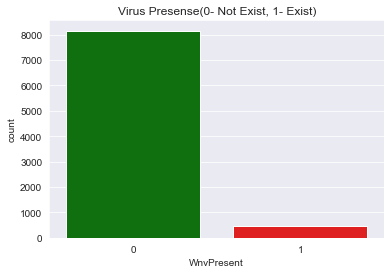

In [25]:
sns.countplot(train_md['WnvPresent'], label="Count", palette=sns.color_palette(['green', 'red']),
              order=pd.value_counts(train_md['WnvPresent']).index)
plt.title('Virus Presense(0- Not Exist, 1- Exist)')
plt.show()

### Distribution of Mosquito species by year

In [20]:
df_mosq_by_year = sub_2[['Species','NumMosquitos','WnvPresent']].groupby([sub_2['year'], sub_2['Species']]).agg('sum')
df_mosq_by_year.reset_index(inplace=True)#.plot(x='Date',y='NumMosquitos')
#df_mosq_by_year

[Text(0.5, 1.0, 'Presences of West Nile Virus per Species')]

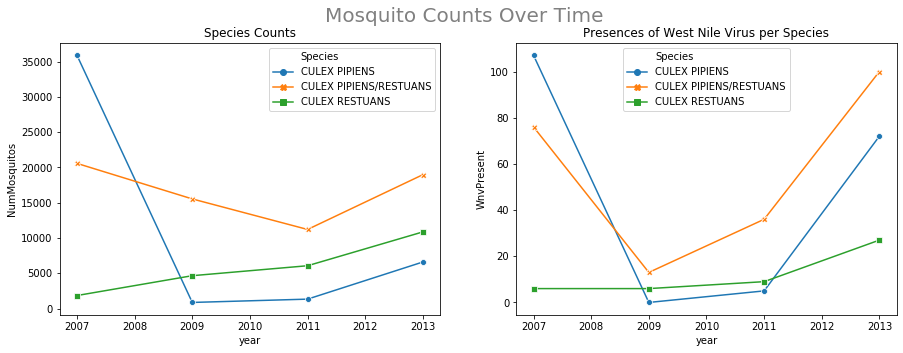

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
fig.suptitle('Mosquito Counts Over Time', ha='center',color = 'grey',fontsize=20,va='top',) 

sns.lineplot(ax=ax1,data=df_mosq_by_year,x='year',y='NumMosquitos',hue='Species', style='Species', markers=True,dashes=False)
ax1.set(title="Species Counts")

sns.lineplot(ax=ax2,data=df_mosq_by_year,x='year',y='WnvPresent',hue='Species', style='Species', markers=True,dashes=False)
ax2.set(title="Presences of West Nile Virus per Species")


---

## Species

In [5]:
#Unique value of Species 
train_md.Species.unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

CULEX PIPIENS/RESTUANS    3899
CULEX RESTUANS            2409
CULEX PIPIENS             1996
CULEX TERRITANS            216
CULEX SALINARIUS            83
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Species types and numbers')

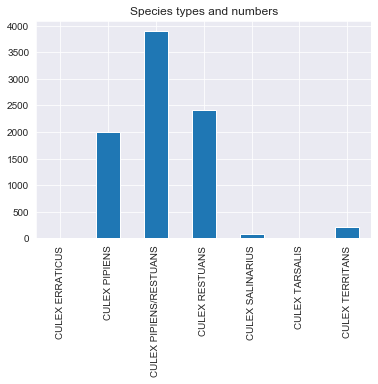

In [20]:
#counts - "CULEX PIPIENS/RESTUANS " founded the most 
    #-> However, this does not mean that this species has the virus the most until we figure out 

print(train_md.Species.value_counts())
print(train_md.Species.value_counts().sort_index().plot.bar())
plt.title('Species types and numbers')


Species
CULEX ERRATICUS             0
CULEX PIPIENS             184
CULEX PIPIENS/RESTUANS    225
CULEX RESTUANS             48
CULEX SALINARIUS            0
CULEX TARSALIS              0
CULEX TERRITANS             0
Name: WnvPresent, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Types of Species that have WNV')

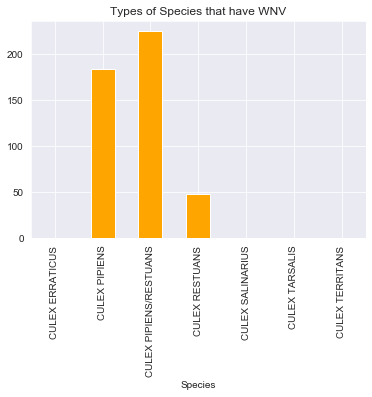

In [21]:
#species that has virus : CULEX PIPIENS, CULEX PIPIENS/RESTUANS, CULEX RESTUANS
       
    # -> Species has the most virus : CULEX PIPIENS/RESTUANS

print(train_md.groupby('Species').sum().WnvPresent)

print(train_md.groupby('Species').sum().WnvPresent.plot.bar(color=['orange']))

plt.title('Types of Species that have WNV')

---

## Block

In [22]:

print(train_md.Block.unique()) #unique value in "Block" 


[11 15 17 21 22 25 89 53 41 62 65 75 79 14 28 35 38 42 50 93 43 10 18 36
 37 40 45 49 58 70 72 91 27 30 96 46 60 61 68 20 12 33 64 39 47 52 55 63
 67 71 73 77 13 24 81 80 66 98 82 48 51 90 29 34]


In [23]:
print(train_md.Block.value_counts().head(10)) # top 10 the number of blocks 


10    906
11    652
22    417
13    313
17    301
37    297
42    265
70    259
52    247
58    244
Name: Block, dtype: int64


Block
10    31852
12    21789
11     8669
70     4637
22     4254
42     3845
41     3710
37     3597
52     3327
24     3315
Name: NumMosquitos, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


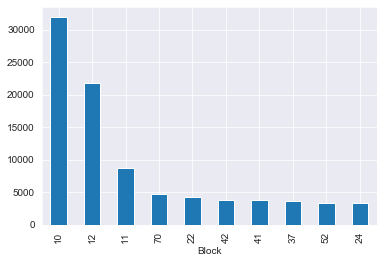

In [26]:
# top 10 blocks that mosquitos appeared the most (both non + virus mosquitos)

print(train_md.groupby('Block').sum().NumMosquitos.sort_values(ascending = False).head(10))
print(train_md.groupby('Block').sum().NumMosquitos.sort_values(ascending = False).head(10).plot.bar())


Block
10    65
22    26
11    24
58    20
42    16
70    15
41    15
12    15
52    15
61    14
Name: WnvPresent, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


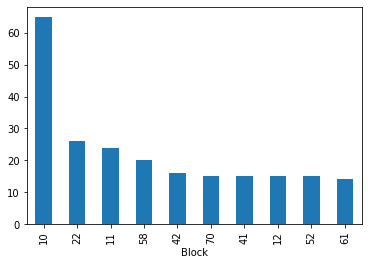

In [17]:
#top 10 blocks that virus mosquitos appeared the most 

print(train_md.groupby('Block').sum().WnvPresent.sort_values(ascending = False).head(10))
print(train_md.groupby('Block').sum().WnvPresent.sort_values(ascending = False).head(10).plot.bar())


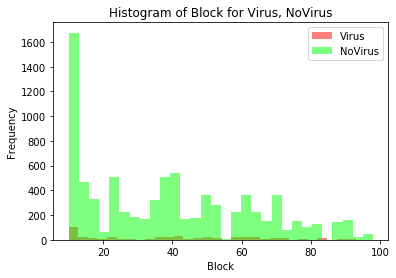

In [21]:
m = plt.hist(train_md[train_md["WnvPresent"] == 1].Block,bins=30,fc = (1,0,0,0.5),label = "Virus")
b = plt.hist(train_md[train_md["WnvPresent"] == 0].Block,bins=30,fc = (0,1,0,0.5),label = "NoVirus")
plt.legend()
plt.xlabel("Block")
plt.ylabel("Frequency")
plt.title("Histogram of Block for Virus, NoVirus")
plt.show()




In [ ]:
#Block Conclusion: Virus Mosquitos appeared the most in Block 10 area 
   #-> block 12 : second the most mosquitos appeared but only 0.06% of thme have virus 

## Relative humidity vs Virus presence


In [19]:
#rel humidity

train_md.rel_hum_station.unique()

array([55.68829305, 61.60010252, 71.47153713, 70.975911  , 61.59006015,
       64.68008351, 79.39596997, 79.0823607 , 58.37654203, 61.54336414,
       51.49099178, 74.55648774, 69.12805053, 70.62277007, 60.7164331 ,
       54.33800881, 47.79713777, 72.5580413 , 75.96921665, 71.94973386,
       75.14622682, 78.82554434, 74.24830075, 81.57004353, 53.40299586,
       78.57430496, 74.85568113, 71.63232254, 73.93075863, 53.27421148,
       58.80671563, 51.58068596, 63.86449693, 65.4937159 , 55.61071411,
       49.29071138, 55.14304628, 58.29219856, 56.73063089, 63.65753821,
       71.00443195, 47.058614  , 50.65514759, 67.74099601, 77.34514394,
       75.72101407, 62.90244447, 51.41294037, 59.13064307, 68.25566943,
       63.89527062, 50.81167871, 57.77628655, 70.26586031, 64.27823591,
       67.54568655, 30.244194  , 52.78580676, 59.52012503, 54.00110214,
       66.36613934, 73.26607989, 45.28756826, 43.77556431, 64.99234239,
       60.37749518, 65.07483092, 64.61715698, 65.94878441, 65.51

rel_hum_station
63.438393    26
56.649704    25
64.617157    25
73.930759    24
78.574305    19
71.632323    19
74.556488    18
50.316539    18
74.248301    17
60.716433    17
Name: WnvPresent, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


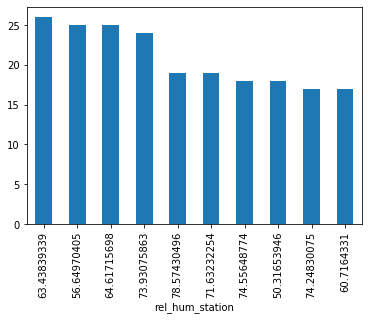

In [20]:
#top 10 rel humidity that virus mosquitos appeared the most 

print(train_md.groupby('rel_hum_station').sum().WnvPresent.sort_values(ascending = False).head(10))
print(train_md.groupby('rel_hum_station').sum().WnvPresent.sort_values(ascending = False).head(10).plot.bar())


rel_hum_station
64.617157    4
63.438393    3
50.316539    2
56.649704    2
60.064968    2
66.771091    2
65.818711    2
81.805294    2
54.001102    1
59.933927    1
Name: WnvPresent, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


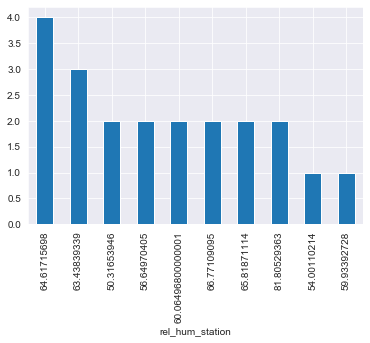

In [46]:
#top 10 rel humidity that virus mosquitos appeared the most in block 10 2013 

print(sub_3_block10.groupby('rel_hum_station').sum().WnvPresent.sort_values(ascending = False).head(10))
print(sub_3_block10.groupby('rel_hum_station').sum().WnvPresent.sort_values(ascending = False).head(10).plot.bar())

[Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10')]

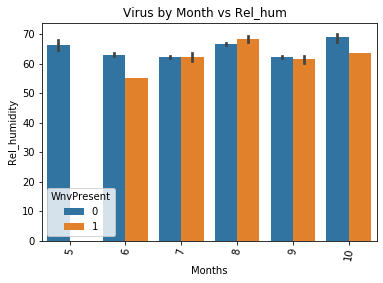

In [18]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='month', hue='WnvPresent', y='rel_hum_station', data=sub_2)
viz_5.set_title('Virus by Month vs Rel_hum  ')
viz_5.set_ylabel('Rel_humidity')
viz_5.set_xlabel('Months')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)



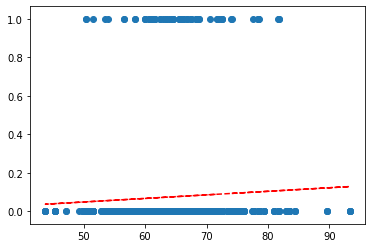

In [14]:
#block10

x = sub_2_block['rel_hum_station']
y = sub_2_block['WnvPresent']
plt.scatter(x, y)


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
 
plt.show()

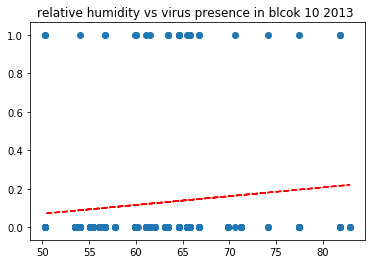

In [17]:
#block10 in 2013 

x = sub_3_block10['rel_hum_station']
y = sub_3_block10['WnvPresent']
plt.scatter(x, y)


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("relative humidity vs virus presence in blcok 10 2013 ")
         
 
plt.show()

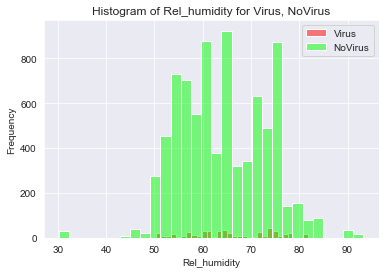

In [44]:
m1 = plt.hist(train_md[train_md["WnvPresent"] == 1].rel_hum_station,bins=30,fc = (1,0,0,0.5),label = "Virus")
b1 = plt.hist(train_md[train_md["WnvPresent"] == 0].rel_hum_station,bins=30,fc = (0,1,0,0.5),label = "NoVirus")
plt.legend()
plt.xlabel("Rel_humidity")
plt.ylabel("Frequency")
plt.title("Histogram of Rel_humidity for Virus, NoVirus")

plt.show()

#### Histogram of Rel_humidity for Virus, NoVirus _Block 10

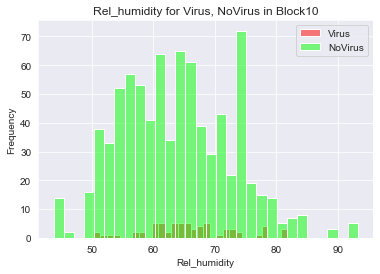

In [38]:
m1 = plt.hist(sub_2_block[sub_2_block["WnvPresent"] == 1].rel_hum_station,bins=30,fc = (1,0,0,0.5),label = "Virus")
b1 = plt.hist(sub_2_block[sub_2_block["WnvPresent"] == 0].rel_hum_station,bins=30,fc = (0,1,0,0.5),label = "NoVirus")
plt.legend()
plt.xlabel("Rel_humidity")
plt.ylabel("Frequency")
plt.title("Rel_humidity for Virus, NoVirus in Block10")

plt.show()

#### Histogram of Rel_humidity for Virus, NoVirus _Block 10 in 2013

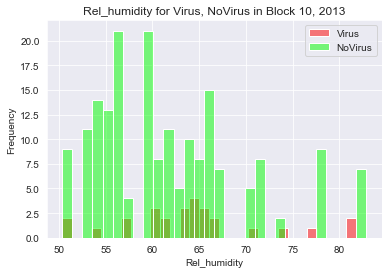

In [43]:

m1 = plt.hist(sub_3_block10[sub_3_block10["WnvPresent"] == 1].rel_hum_station,bins=30,fc = (1,0,0,0.5),label = "Virus")
b1 = plt.hist(sub_3_block10[sub_3_block10["WnvPresent"] == 0].rel_hum_station,bins=30,fc = (0,1,0,0.5),label = "NoVirus")
plt.legend()
plt.xlabel("Rel_humidity")
plt.ylabel("Frequency")
plt.title("Rel_humidity for Virus, NoVirus in Block 10, 2013")

plt.show()





In [58]:
print(sub_2_block.pivot_table(index=["month", "Species"], values=["Trap"], aggfunc=[len]))

                              len
                             Trap
month Species                    
5     CULEX PIPIENS/RESTUANS    4
      CULEX RESTUANS            4
6     CULEX PIPIENS            15
      CULEX PIPIENS/RESTUANS   53
      CULEX RESTUANS           65
7     CULEX PIPIENS            39
      CULEX PIPIENS/RESTUANS   97
      CULEX RESTUANS           85
8     CULEX PIPIENS            92
      CULEX PIPIENS/RESTUANS  119
      CULEX RESTUANS           63
9     CULEX PIPIENS            81
      CULEX PIPIENS/RESTUANS   91
      CULEX RESTUANS           46
10    CULEX PIPIENS            10
      CULEX PIPIENS/RESTUANS    9
      CULEX RESTUANS            3


##### WNV presence in block 10 by year and month 

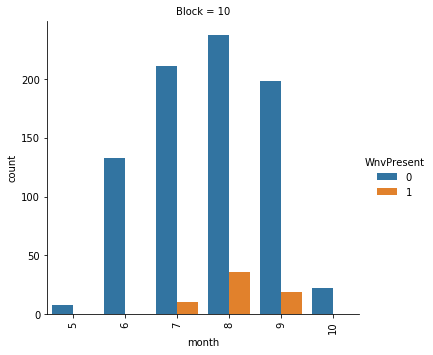

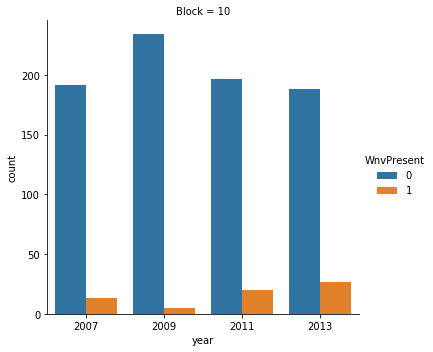

In [10]:
viz_1=sns.catplot(x='month', hue='WnvPresent', col='Block', data=sub_2_block, kind='count')
viz_1.set_xticklabels(rotation=90)
viz_10=sns.catplot(x='year', hue='WnvPresent', col='Block', data=sub_2_block, kind='count')
print(viz_1)
print(viz_10)


In [9]:
proportion_virus = go.Pie(labels = ["CULEX PIPIENS/RESTUANS","CULEX PIPIENS","CULEX RESTUANS"], values = sub_2_block
               ['Species'].value_counts(), 
               marker=dict(colors=['red', 'green', 'blue'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Virus Mosquito Proportion in Block10')
           
fig = dict(data = [proportion_virus], layout=layout)
py.iplot(fig)

In [13]:
#block 10 yes/no 
proportion_virus = go.Pie(labels = ['no virus','yes virus'], values = sub_2_block
               ['WnvPresent'].value_counts(), 
               marker=dict(colors=['green', 'red'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  '% of virus presence in blcok 10')
           
fig = dict(data = [proportion_virus], layout=layout)
py.iplot(fig)

## Temperature, Precipitation vs WNV presence 

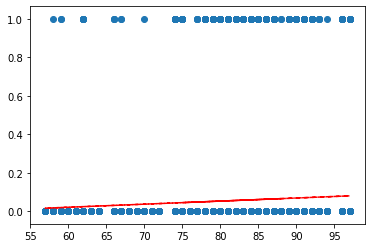

In [59]:
#overall
x = sub_2['Tmax_Station']
y = sub_2['WnvPresent']
plt.scatter(x, y)


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
 
plt.show()

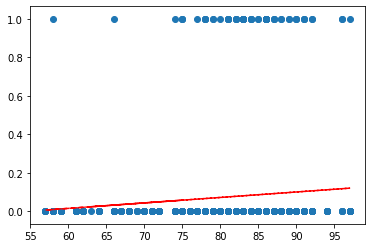

In [61]:
#block10

x = sub_2_block['Tmax_Station']
y = sub_2_block['WnvPresent']
plt.scatter(x, y)


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
 
plt.show()

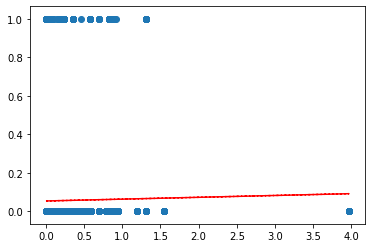

In [22]:
#overall
x = sub_2['PrecipTotal_Station']
y = sub_2['WnvPresent']
plt.scatter(x, y)


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
 
plt.show()

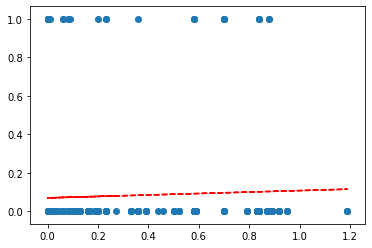

In [62]:
#block10
x = sub_2_block['PrecipTotal_Station']
y = sub_2_block['WnvPresent']
plt.scatter(x, y)


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
 
plt.show()

In [24]:
# Results : Found out no important association between precipitation - WNV Presence / Temperature - WNV Presence


## GEO MAP 

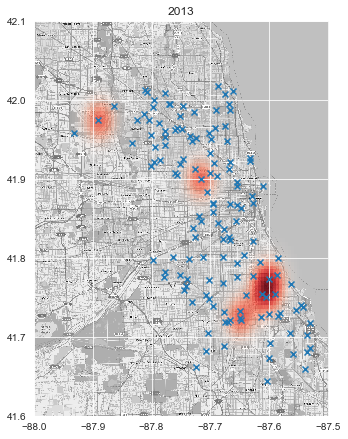

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("../kaggle/mapdata_copyright_openstreetmap_contributors.txt")


alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(18,6))
for year, subplot in zip([2013], [141, 142, 143, 144]):
    sightings = sub_3_block10[(sub_3_block10['WnvPresent'] > 0) & (sub_3_block10['year'])]
    sightings = sightings.groupby(['year', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
    X = sightings[['Longitude', 'Latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    plt.subplot(subplot)
    plt.gca().set_title(year)
    plt.imshow(mapdata, 
               cmap=plt.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    plt.imshow(zv, 
               origin='lower', 
               cmap=alpha_cm, 
               extent=lon_lat_box, 
               aspect=aspect)
    plt.tight_layout()
    locations = virus_sub2[['Longitude', 'Latitude']].drop_duplicates().values
    plt.scatter(locations[:,0], locations[:,1], marker='x')

plt.savefig('heatmap.png')

In [33]:
chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)
m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=sub_3_block10,
    columns=['WnvPresent', 'NumMosquitos'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Choropleth of Homicide per Police District : 2001-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map1.html") 
IFrame('map1.html', width=990, height=700)



NameError: name 'sub_3_block10' is not defined

/Users/leeyeji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



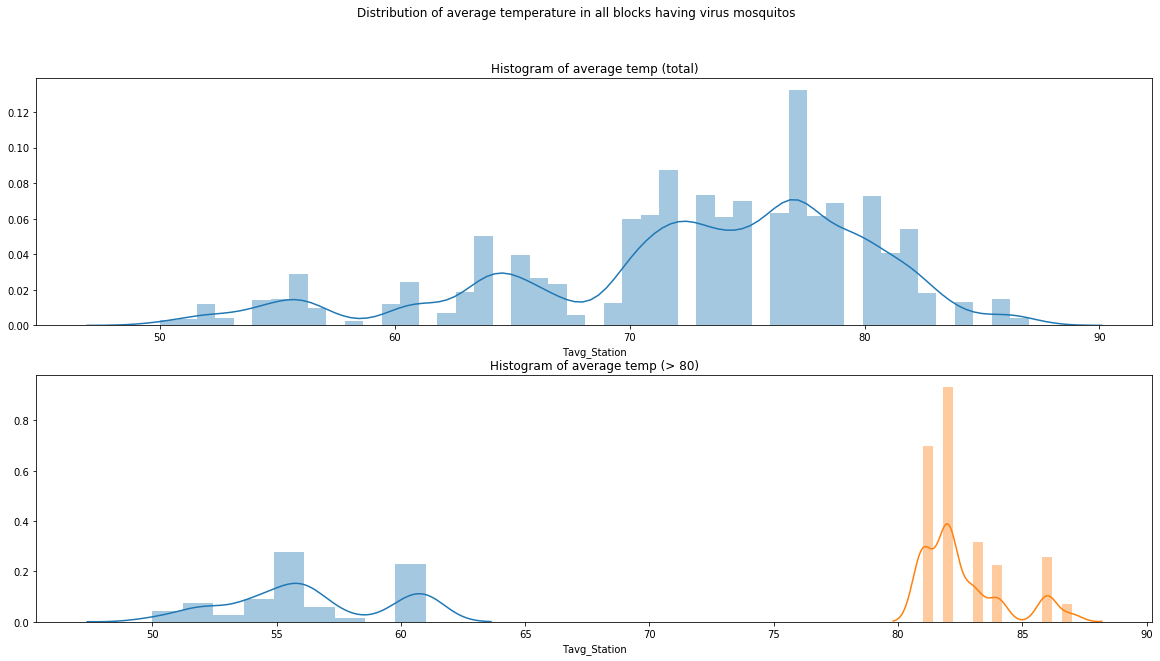

In [100]:
fig, ax= plt.subplots(2,1, figsize=(20,10))

ax[0].set_title("Histogram of average temp (total)")
sns.distplot(sub_2['Tavg_Station'], kde=True, ax=ax[0])
ax[1].set_title("Histogram of average temp (< 62)")
sns.distplot(sub_2[sub_2['Tavg_Station'] < 62]['Tavg_Station'], kde=True, ax=ax[1])
ax[1].set_title("Histogram of average temp (> 80)")
sns.distplot(sub_2[sub_2['Tavg_Station'] > 80]['Tavg_Station'], kde=True, ax=ax[1])


fig.suptitle("Distribution of average temperature in all blocks having virus mosquitos")
fig.show()


/Users/leeyeji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



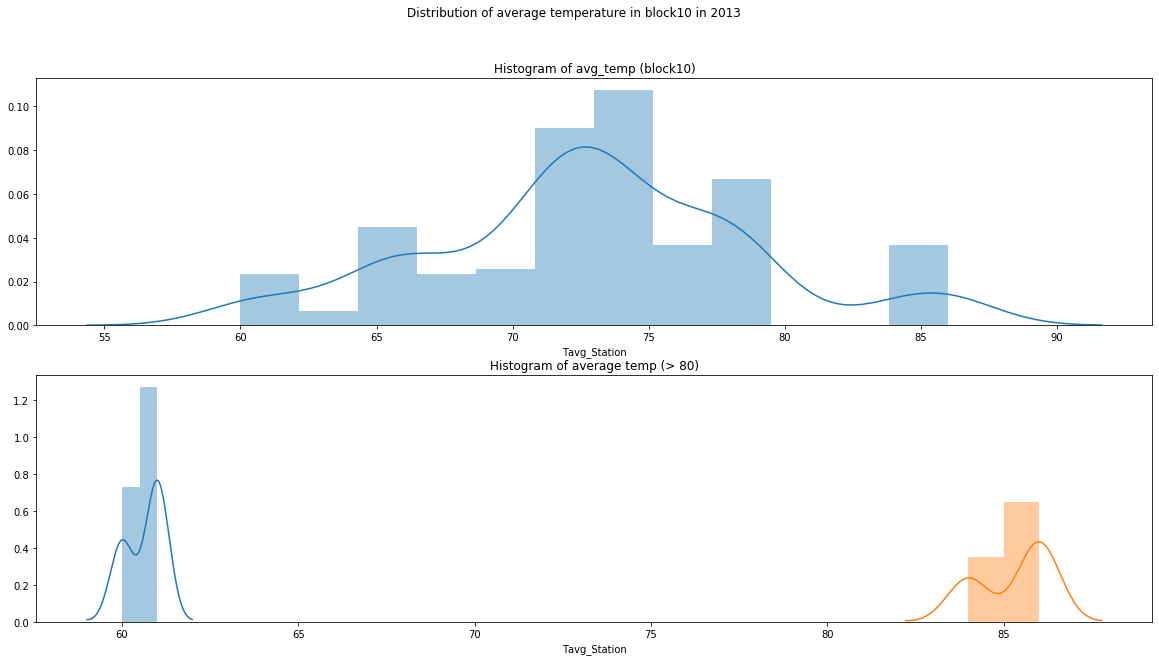

In [106]:
fig, ax= plt.subplots(2,1, figsize=(20,10))

ax[0].set_title("Histogram of avg_temp (block10)")
sns.distplot(sub_3_block10['Tavg_Station'], kde=True, ax=ax[0])
ax[1].set_title("Histogram of avg_temp (< 62)")
sns.distplot(sub_3_block10[sub_3_block10['Tavg_Station'] < 62]['Tavg_Station'], kde=True, ax=ax[1])
ax[1].set_title("Histogram of average temp (> 80)")
sns.distplot(sub_3_block10[sub_3_block10['Tavg_Station'] > 80]['Tavg_Station'], kde=True, ax=ax[1])


fig.suptitle("Distribution of average temperature in block10 in 2013 ")
fig.show()


/Users/leeyeji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



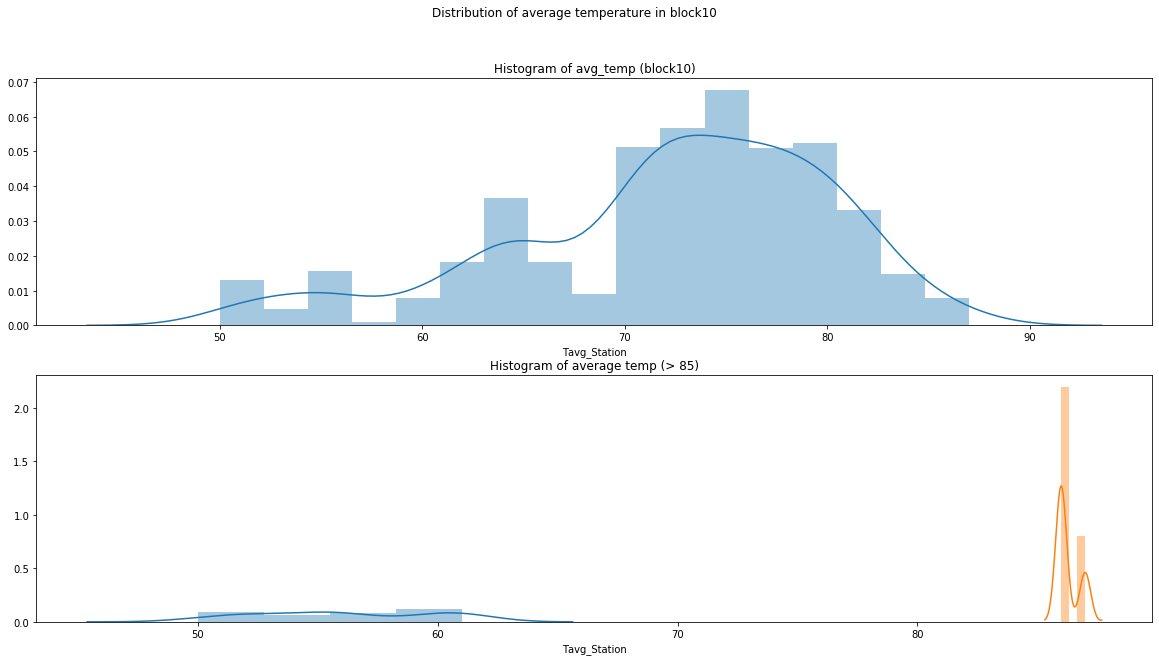

In [110]:



fig, ax= plt.subplots(2,1, figsize=(20,10))

ax[0].set_title("Histogram of avg_temp (block10)")
sns.distplot(sub_2_block['Tavg_Station'], kde=True, ax=ax[0])
ax[1].set_title("Histogram of avg_temp (< 62)")
sns.distplot(sub_2_block[sub_2_block['Tavg_Station'] < 62]['Tavg_Station'], kde=True, ax=ax[1])
ax[1].set_title("Histogram of average temp (> 85)")
sns.distplot(sub_2_block[sub_2_block['Tavg_Station'] > 85]['Tavg_Station'], kde=True, ax=ax[1])


fig.suptitle("Distribution of average temperature in block10 ")
fig.show()



/Users/leeyeji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



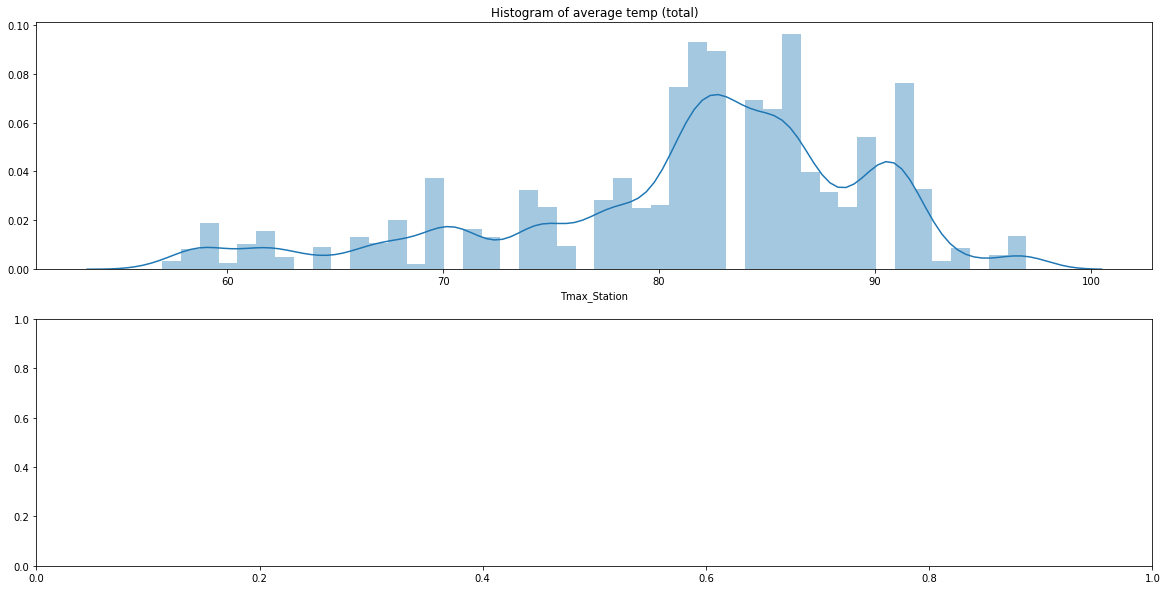

In [102]:
fig, ax= plt.subplots(2,1, figsize=(20,10))

ax[0].set_title("Histogram of average temp (total)")
sns.distplot(sub_2['Tmax_Station'], kde=True, ax=ax[0])

fig.show()

---

## Model Building

In [3]:
train_md=pd.read_csv("train_spray_weather_AL.csv",float_precision='round_trip')

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import binarize


from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import(
    classification_report, confusion_matrix, accuracy_score,
    f1_score,recall_score,precision_score, roc_auc_score
)


import warnings
warnings.filterwarnings("ignore")




In [55]:

train_md.WnvPresent.value_counts()

0    8153
1     457
Name: WnvPresent, dtype: int64

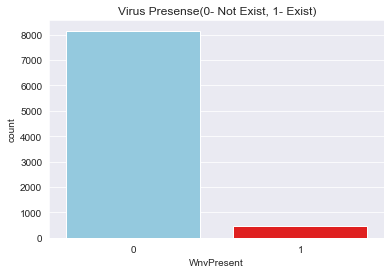

In [60]:
sns.countplot(train_md['WnvPresent'], label="Count", palette=sns.color_palette(['skyblue', 'red']),
              order=pd.value_counts(train_md['WnvPresent']).index)
plt.title('Virus Presense(0- Not Exist, 1- Exist)')
plt.show()

In [ ]:
#The dataset is imbalanced 

# There are many more cases of negative results than positive results for the presence of West Nile virus.
# Therefore, We need to take action to address this imbalance prior to training a model


## model 1 

In [5]:
#dropping variables 

master2 = train_md.drop(['NumMosquitos','Address', 'AddressNumberAndStreet', 
                        'Street','Date','CodeSum_Station'],axis=1)



In [6]:
# creating a variable for length of the day (special thanks to SM)

master2['Sunrise_Station'] = pd.to_datetime(master2['Sunrise_Station'],format='%H:%M:%S')
master2['Sunset_Station'] = pd.to_datetime(master2['Sunset_Station'], format='%H:%M:%S')
master2['length_of_day']=(master2['Sunset_Station'] - master2['Sunrise_Station']).dt.total_seconds()
master2['length_of_day']=master2['length_of_day'].astype(int)
master2 = master2.drop(['Sunrise_Station', 'Sunset_Station'], axis=1)

In [7]:
# define X and y, dropping unnecessary columns
master3 = master2.drop(['WnvPresent'], axis=1)
y = master2['WnvPresent']

In [8]:
# enumerate  SPECIES 

def score_to_numeric(x):

    if x=='CULEX PIPIENS/RESTUANS':

        return 1

    if x=='CULEX RESTUANS':

        return 2

    if x=='CULEX PIPIENS':

        return 3

    if x=='CULEX SALINARIUS':

        return 4

    if x=='CULEX TERRITANS':

        return 5

    if x=='CULEX TARSALIS':

        return 6

    if x=='CULEX ERRATICUS':

        return 7




master3['Species_Dum'] = master3['Species'].apply(score_to_numeric)

master3.head()




,Species,Block,Trap,Latitude,Longitude,AddressAccuracy,year,month,day,dist_2011-08-29 00:00:00,...,NO_EVENT,RA,SN,SQ,TS,TSRA,VCFG,VCTS,length_of_day,Species_Dum
0,CULEX PIPIENS/RESTUANS,11,T048,41.867108,-87.654224,8,2007,5,29,42.432451,...,0,0,0,0,0,0,0,0,53760,1
1,CULEX RESTUANS,11,T048,41.867108,-87.654224,8,2007,5,29,42.432451,...,0,0,0,0,0,0,0,0,53760,2
2,CULEX RESTUANS,11,T091,41.862292,-87.648860,8,2007,5,29,42.860201,...,0,0,0,0,0,0,0,0,53760,2
3,CULEX RESTUANS,11,T049,41.896282,-87.655232,8,2007,5,29,40.699077,...,0,0,0,0,0,0,0,0,53760,2
4,CULEX RESTUANS,15,T153,41.907645,-87.760886,8,2007,5,29,37.319043,...,0,0,0,0,0,0,0,0,53760,2


In [9]:
#drop original species, it's categorical 
master3.drop('Species',axis =1, inplace = True)

In [10]:
#make dummy for trap (special thanks to JW) 

master3_dm = pd.get_dummies(master3, columns=['Trap'], prefix = [''])
l = (len(list(master3_dm.columns))-len(master3.Trap.value_counts()))
master3 = pd.concat([master3,master3_dm.iloc[:,l:]],axis=1)
master3.drop('Trap',axis =1 , inplace = True)

In [11]:
#SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(master3, y, test_size=0.3, random_state=2000)

In [12]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf4 = RandomForestClassifier(n_estimators=100) 
## Fit the model on your training data.
rf4.fit(X_train, y_train) 
## And score it on your testing data.
#rf.score(X_test, y_test)

#Train the model using the training sets y_pred=clf.predict(X_test)
y_pred=rf4.predict(X_test)

In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9264421215640728
Precision: 0.1875
Recall: 0.13846153846153847


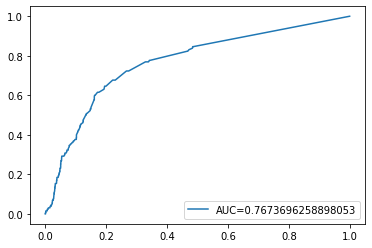

In [14]:
y_pred_proba = rf4.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

---

### model 2 _ dropped var that Jenn posted on the doc 

In [15]:
master = train_md.drop(['NumMosquitos','Address','AddressAccuracy', 'AddressNumberAndStreet', 
                        'Street','Date','Block','CodeSum_Station'],axis=1)

In [16]:
# creating a variable for length of the day (special thanks to SM)

master['Sunrise_Station'] = pd.to_datetime(master['Sunrise_Station'],format='%H:%M:%S')
master['Sunset_Station'] = pd.to_datetime(master['Sunset_Station'], format='%H:%M:%S')
master['length_of_day']=(master['Sunset_Station'] - master['Sunrise_Station']).dt.total_seconds()
master['length_of_day']=master['length_of_day'].astype(int)
master = master.drop(['Sunrise_Station', 'Sunset_Station'], axis=1)

In [17]:
# define X and y, dropping unnecessary columns
master1 = master.drop(['WnvPresent'], axis=1)
z = master['WnvPresent']

In [18]:
#In order to see frequency by diagnosis for each variable, changed "M" & "N" to "1" & "0"

def score_to_numeric(x):

    if x=='CULEX PIPIENS/RESTUANS':

        return 1

    if x=='CULEX RESTUANS':

        return 2

    if x=='CULEX PIPIENS':

        return 3

    if x=='CULEX SALINARIUS':

        return 4

    if x=='CULEX TERRITANS':

        return 5

    if x=='CULEX TARSALIS':

        return 6

    if x=='CULEX ERRATICUS':

        return 7




master1['Species_Dum'] = master1['Species'].apply(score_to_numeric)

master1.head()




,Species,Trap,Latitude,Longitude,year,month,day,dist_2011-08-29 00:00:00,dist_2011-09-07 00:00:00,dist_2013-07-17 00:00:00,...,NO_EVENT,RA,SN,SQ,TS,TSRA,VCFG,VCTS,length_of_day,Species_Dum
0,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,2007,5,29,42.432451,9.840987,8.553039,...,0,0,0,0,0,0,0,0,53760,1
1,CULEX RESTUANS,T048,41.867108,-87.654224,2007,5,29,42.432451,9.840987,8.553039,...,0,0,0,0,0,0,0,0,53760,2
2,CULEX RESTUANS,T091,41.862292,-87.648860,2007,5,29,42.860201,10.271628,8.220944,...,0,0,0,0,0,0,0,0,53760,2
3,CULEX RESTUANS,T049,41.896282,-87.655232,2007,5,29,40.699077,8.481519,8.971282,...,0,0,0,0,0,0,0,0,53760,2
4,CULEX RESTUANS,T153,41.907645,-87.760886,2007,5,29,37.319043,4.442608,6.230936,...,0,0,0,0,0,0,0,0,53760,2


In [19]:
master1.drop('Species',axis =1, inplace = True)

In [20]:
master1_dm = pd.get_dummies(master1, columns=['Trap'], prefix = [''])
l = (len(list(master1_dm.columns))-len(master1.Trap.value_counts()))
master1 = pd.concat([master1,master1_dm.iloc[:,l:]],axis=1)
master1.drop('Trap',axis =1 , inplace = True)

In [21]:
#master2 = master1.drop('Species',axis =1 , inplace = True)

In [11]:
type(master1)

pandas.core.frame.DataFrame

In [22]:
from sklearn.model_selection import train_test_split
U_train, U_test, z_train, z_test = train_test_split(master1, z, test_size=0.3, random_state=2000)

In [23]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier(n_estimators=100) 
## Fit the model on your training data.
rf.fit(X_train, z_train) 
## And score it on your testing data.
#rf.score(X_test, y_test)

#Train the model using the training sets y_pred=clf.predict(X_test)
z_pred=rf.predict(X_test)

In [24]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(z_test, z_pred))
print("Precision:",metrics.precision_score(z_test, z_pred))
print("Recall:",metrics.recall_score(z_test, z_pred))

Accuracy: 0.9256678281068524
Precision: 0.19
Recall: 0.14615384615384616


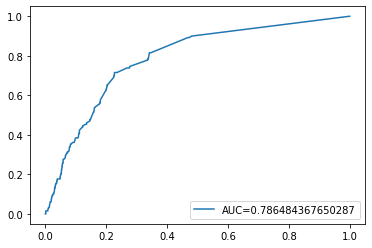

In [25]:
z_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(z_test,  z_pred_proba)
auc = metrics.roc_auc_score(z_test, z_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

#### Select 10 Best Features and use Random Forest Classifier

In [17]:

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [18]:
feature_importances.head(10)

,importance
Species_Dum,0.179891
dist_2011-08-29 00:00:00,0.031497
dist_2013-08-08 00:00:00,0.031101
Longitude,0.030271
trap_dist_st1,0.030174
dist_2011-09-07 00:00:00,0.028923
dist_2013-07-17 00:00:00,0.028797
dist_2013-08-15 00:00:00,0.028718
dist_2013-08-16 00:00:00,0.028683
dist_2013-08-29 00:00:00,0.028243


---

### model 3 _ dropping dist_ var

In [20]:
masterTRY = train_md.drop(['NumMosquitos','Address','AddressAccuracy', 'AddressNumberAndStreet', 
                        'Street','Date','Block','CodeSum_Station',
                          'dist_2011-08-29 00:00:00', 'dist_2011-09-07 00:00:00',  
                          'dist_2013-07-17 00:00:00', 'dist_2013-07-25 00:00:00',
                          'dist_2013-08-08 00:00:00', 'dist_2013-08-15 00:00:00', 
                          'dist_2013-08-16 00:00:00', 'dist_2013-08-22 00:00:00',
                          'dist_2013-08-29 00:00:00', 'dist_2013-09-05 00:00:00'],axis=1)

In [21]:
# creating a variable for length of the day (special thanks to SM)

masterTRY['Sunrise_Station'] = pd.to_datetime(masterTRY['Sunrise_Station'],format='%H:%M:%S')
masterTRY['Sunset_Station'] = pd.to_datetime(masterTRY['Sunset_Station'], format='%H:%M:%S')
masterTRY['length_of_day']=(masterTRY['Sunset_Station'] - masterTRY['Sunrise_Station']).dt.total_seconds()
masterTRY['length_of_day']=masterTRY['length_of_day'].astype(int)
masterTRY = masterTRY.drop(['Sunrise_Station', 'Sunset_Station'], axis=1)

In [22]:
# define X and y, dropping unnecessary columns
masterTRY1 = masterTRY.drop(['WnvPresent'], axis=1)
y = masterTRY['WnvPresent']

In [23]:
#In order to see frequency by diagnosis for each variable, changed "M" & "N" to "1" & "0"

def score_to_numeric(x):

    if x=='CULEX PIPIENS/RESTUANS':

        return 1

    if x=='CULEX RESTUANS':

        return 2

    if x=='CULEX PIPIENS':

        return 3

    if x=='CULEX SALINARIUS':

        return 4

    if x=='CULEX TERRITANS':

        return 5

    if x=='CULEX TARSALIS':

        return 6

    if x=='CULEX ERRATICUS':

        return 7




masterTRY1['Species_Dum'] = masterTRY1['Species'].apply(score_to_numeric)

masterTRY1.head()




,Species,Trap,Latitude,Longitude,year,month,day,days_2011-08-29 00:00:00,days_2011-09-07 00:00:00,days_2013-07-17 00:00:00,...,NO_EVENT,RA,SN,SQ,TS,TSRA,VCFG,VCTS,length_of_day,Species_Dum
0,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,2007,5,29,1553,1562,2241,...,0,0,0,0,0,0,0,0,53760,1
1,CULEX RESTUANS,T048,41.867108,-87.654224,2007,5,29,1553,1562,2241,...,0,0,0,0,0,0,0,0,53760,2
2,CULEX RESTUANS,T091,41.862292,-87.648860,2007,5,29,1553,1562,2241,...,0,0,0,0,0,0,0,0,53760,2
3,CULEX RESTUANS,T049,41.896282,-87.655232,2007,5,29,1553,1562,2241,...,0,0,0,0,0,0,0,0,53760,2
4,CULEX RESTUANS,T153,41.907645,-87.760886,2007,5,29,1553,1562,2241,...,0,0,0,0,0,0,0,0,53760,2


In [24]:
masterTRY1.drop('Species',axis =1, inplace = True)

In [25]:
masterTRY1_dm = pd.get_dummies(masterTRY1, columns=['Trap'], prefix = [''])
l = (len(list(masterTRY1_dm.columns))-len(masterTRY1.Trap.value_counts()))
masterTRY1 = pd.concat([masterTRY1,masterTRY1_dm.iloc[:,l:]],axis=1)
masterTRY1.drop('Trap',axis =1 , inplace = True)

In [26]:
#from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(masterTRY1, y, test_size=0.3, random_state=2000)

In [27]:
X_train.shape, X_test.shape

((6027, 191), (2583, 191))

In [12]:
## Import the random forest model.
#from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
#rf = RandomForestClassifier() 
## Fit the model on your training data.
#rf.fit(X_train, y_train) 
## And score it on your testing data.
#rf.score(X_test, y_test)

0.9368950832365467

In [28]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf2 = RandomForestClassifier(n_estimators=100) 
## Fit the model on your training data.
rf2.fit(X_train, y_train) 
## And score it on your testing data.
#rf.score(X_test, y_test)

#Train the model using the training sets y_pred=clf.predict(X_test)
y_pred=rf2.predict(X_test)

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9291521486643438
Precision: 0.1267605633802817
Recall: 0.06923076923076923


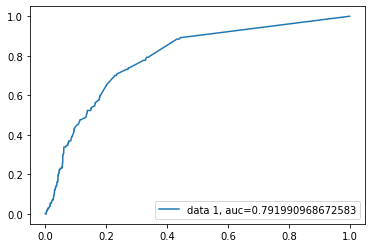

In [30]:
y_pred_proba = rf2.predict_proba(U_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [32]:

feature_importances = pd.DataFrame(rf2.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [33]:
feature_importances.head(10)

,importance
Species_Dum,0.170013
trap_dist_st1,0.086143
Longitude,0.079562
Latitude,0.075480
trap_dist_st2,0.072427
days_2013-08-22 00:00:00,0.014060
days_2013-07-17 00:00:00,0.013096
days_2013-08-16 00:00:00,0.012258
days_2013-09-05 00:00:00,0.011532
days_2011-09-07 00:00:00,0.011489


## SMOTE w/ model 2 

In [26]:
pip install imbalanced-learn


     |████████████████████████████████| 174kB 6.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
U_resampled, z_resampled = SMOTE().fit_resample(U_train, z_train)

len(z_resampled), z_train.shape, type(z_resampled), type(z_test)

(11400, (6027,), numpy.ndarray, pandas.core.series.Series)

In [28]:

U_train=pd.DataFrame(U_resampled, columns=U_train.columns)
U_train.head()

,Latitude,Longitude,year,month,day,dist_2011-08-29 00:00:00,dist_2011-09-07 00:00:00,dist_2013-07-17 00:00:00,dist_2013-07-25 00:00:00,dist_2013-08-08 00:00:00,...,_T230,_T231,_T232,_T233,_T235,_T236,_T237,_T238,_T900,_T903
0,41.921600,-87.666455,2007.0,8.0,1.0,38.920203,7.059776,7.269895,2.726226,0.605839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41.798697,-87.736812,2009.0,7.0,17.0,44.659623,12.030592,5.423103,9.716421,8.272070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41.963976,-87.691810,2009.0,7.0,31.0,35.765440,4.952308,4.379108,0.865021,1.208485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41.954690,-87.800991,2013.0,7.0,12.0,33.493388,0.950479,3.433172,3.161798,4.522657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41.798697,-87.736812,2011.0,8.0,19.0,44.659623,12.030592,5.423103,9.716421,8.272070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:

z_train=pd.Series(z_resampled)
type(z_train), type(z_test)

(pandas.core.series.Series, pandas.core.series.Series)

In [30]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf3 = RandomForestClassifier(n_estimators=100) 
## Fit the model on your training data.
rf3.fit(U_train, z_train) 
## And score it on your testing data.
#rf.score(X_test, y_test)

#Train the model using the training sets y_pred=clf.predict(X_test)
z_pred=rf3.predict(U_test)

In [31]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(z_test, z_pred))
print("Precision:",metrics.precision_score(z_test, z_pred))
print("Recall:",metrics.recall_score(z_test, z_pred))

Accuracy: 0.9144405729771583
Precision: 0.16296296296296298
Recall: 0.16923076923076924


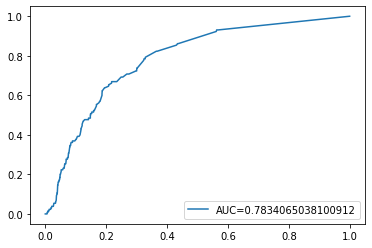

In [32]:
z_pred_proba = rf3.predict_proba(U_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(z_test,  z_pred_proba)
auc = metrics.roc_auc_score(z_test, z_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()